In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Download historical stock prices from Yahoo Finance
import yfinance as yf
data = yf.download("AAPL", start="2018-01-01", end="2024-12-31")
df = data[['Close']]
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2018-01-02,40.426830
2018-01-03,40.419785
2018-01-04,40.607533
2018-01-05,41.069855
2018-01-08,40.917320


In [ ]:
train_size = int(len(df) * 0.85)
train, test = df[:train_size], df[train_size:]


In [ ]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

adf_test(train['Close'])


ADF Statistic: -0.4721442209018214
p-value: 0.897338696521438
Data is non-stationary


In [ ]:
arima_model = ARIMA(train['Close'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test))


In [ ]:
es_model = ExponentialSmoothing(train['Close'], trend='add', seasonal=None)
es_fit = es_model.fit()
es_pred = es_fit.forecast(len(test))


In [ ]:
def evaluate(true, pred, model_name):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    print(f"{model_name} -> RMSE: {rmse:.2f}, MAE: {mae:.2f}")

evaluate(test['Close'], arima_pred, "ARIMA")
evaluate(test['Close'], es_pred, "Exponential Smoothing")


ARIMA -> RMSE: 28.41, MAE: 23.79
Exponential Smoothing -> RMSE: 18.78, MAE: 16.20


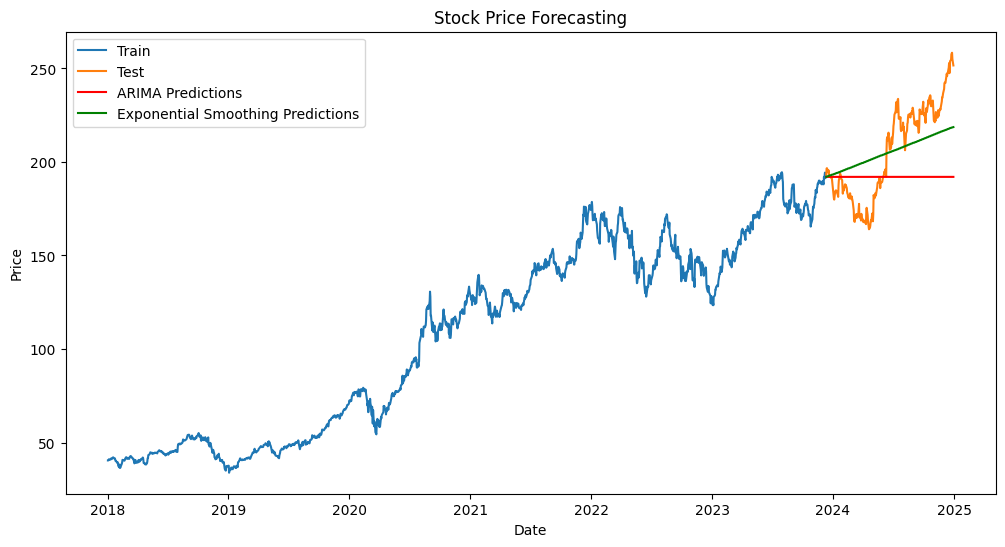

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, arima_pred, label='ARIMA Predictions', color='red')
plt.plot(test.index, es_pred, label='Exponential Smoothing Predictions', color='green')
plt.title("Stock Price Forecasting")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
